##### Name: Huiqi Wang
##### Github Username: wang2bbq
##### USC ID: 6613859213

# 1. Tree-Based Methods

## a. Download the APS Failure data

In [205]:
import pandas as pd
import numpy as np

In [206]:
df_train = pd.read_csv('../data/Homework 6 Data/aps_failure_training_set.csv', skiprows=20, sep=',', header=0)
df_test = pd.read_csv('../data/Homework 6 Data/aps_failure_test_set.csv', skiprows=20, sep=',', header=0)
df_train

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


## b. Data Preparation

### i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps

Techniques used for dealing with data with missing values:
1. Use a constant value that has meaning within the domain, such as 0 or Missing
2. Use a feature value from another randomly selected observation
3. Use a statistic such as mean, median or mode value of the feature
4. Use predictive models to predict the missing value based on other data points that do not have missing values
5. Use an iterative method based on Expectation Maximization 

I will use the mean of the feature.

In [207]:
df = pd.concat([df_train, df_test], ignore_index=True)
# Transform y to 0-1
for i in range(len(df)):
    if df.loc[i,'class'] == 'neg':
        df.loc[i,'class'] = 0
    elif df.loc[i,'class'] == 'pos':
        df.loc[i,'class'] = 1
df_X = df.iloc[:,1:]
df_y = df.loc[:,'class']
df_X = df_X.replace(to_replace='na', value=np.nan)
df_X = df_X.astype('float64')

In [208]:
# Find mean for each feature
means = df_X.mean(axis=0, skipna=True)
# Fill nan with mean of each feature
df_X_trans = df_X.fillna(means)
df_X_trans

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,81852.0,0.72556,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,18.0,0.00000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,79636.0,0.72556,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,110.0,0.72556,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [209]:
X_train = df_X_trans.iloc[:60000,:] # X train
y_train = df_y.iloc[:60000]       # y train

X_test = df_X_trans.iloc[60000:,:]  
X_test.index=[i for i in range(16000)] # X test

y_test = df_y.iloc[60000:]        
y_test.index=[i for i in range(16000)] # y test

### ii. For each of the 170 features, calculate the coefficient of variation CV= s/m, where s is sample standard deviation and m is sample mean

In [210]:
std_df = pd.DataFrame(X_train.std(),  columns=['std'])
mean_df = pd.DataFrame(X_train.mean(),  columns=['mean'])
std_mean_df = pd.concat([std_df,mean_df],axis=1)
std_mean_df['CV'] = std_mean_df.apply(lambda x: x['std']/x['mean'], axis=1)
CV_df = std_mean_df
CV_df

,std,mean,CV
aa_000,1.454301e+05,5.933650e+04,2.450938
ab_000,1.660596e+00,7.227415e-01,2.297635
ac_000,7.724678e+08,3.560379e+08,2.169622
ad_000,3.504516e+07,1.807156e+05,193.924333
ae_000,1.581420e+02,6.815707e+00,23.202587
...,...,...,...
ee_007,1.718366e+06,3.462859e+05,4.962276
ee_008,4.469894e+05,1.387430e+05,3.221707
ee_009,4.720424e+04,8.389318e+03,5.626708
ef_000,4.268529e+00,9.033463e-02,47.252412


### iii. Plot a correlation matrix for your features using pandas or any other tool

          aa_000    ab_000    ac_000    ad_000    ae_000    af_000    ag_000  \
aa_000  1.000000  0.030175 -0.020725 -0.001211  0.046221  0.066728  0.018542   
ab_000  0.030175  1.000000 -0.009898  0.000061  0.028726  0.043836  0.000602   
ac_000 -0.020725 -0.009898  1.000000 -0.002200 -0.004944 -0.010270  0.017527   
ad_000 -0.001211  0.000061 -0.002200  1.000000 -0.000202 -0.000249 -0.000046   
ae_000  0.046221  0.028726 -0.004944 -0.000202  1.000000  0.823108 -0.000428   
...          ...       ...       ...       ...       ...       ...       ...   
ee_007  0.603875  0.011456 -0.018974 -0.000579  0.037793  0.050698  0.000307   
ee_008  0.469871  0.002848  0.011793 -0.000999 -0.008472 -0.010907 -0.000823   
ee_009  0.247074  0.000919  0.019421 -0.000609 -0.006779 -0.008451 -0.001230   
ef_000  0.014026  0.051616 -0.006164 -0.000093  0.070835  0.106272 -0.000072   
eg_000  0.026445  0.104281  0.014228 -0.000111  0.041685  0.060704  0.000244   

          ag_001    ag_002    ag_003  .

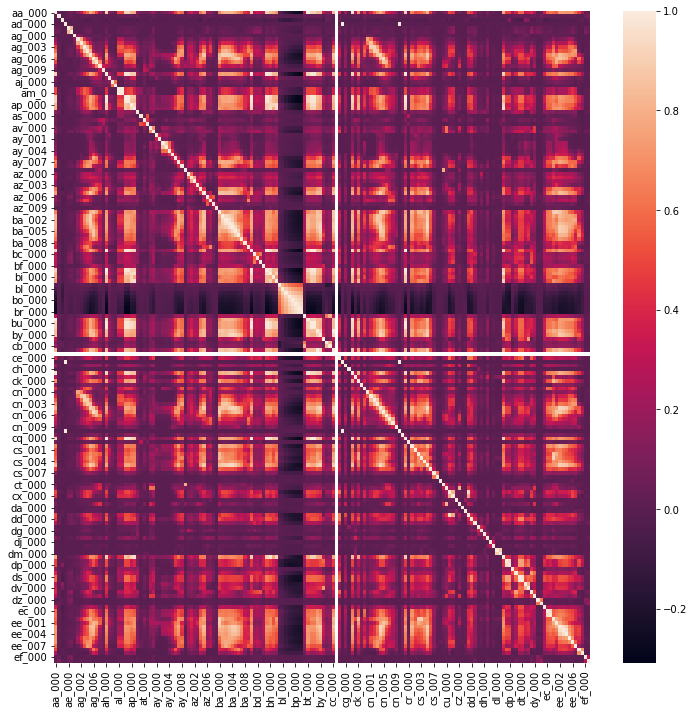

In [211]:
import seaborn as sn
import matplotlib.pyplot as plt
corr_matrix = X_train.corr()
print(corr_matrix)

fig1, ax1 = plt.subplots(figsize=(12,12))
sn.heatmap(corr_matrix, ax=ax1)
plt.show()

### iv. Pick b√170c features with highest CV, and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization

In [212]:
# Pick p features with highest CV
import math
p = math.floor(math.sqrt(170)) # p features with highest CV
CV_sort_df = CV_df.sort_values(by='CV', ascending=False) # sort by CV
CV_p_features_df = CV_sort_df.iloc[:p]
CV_p_features_df

,std,mean,CV
cs_009,1.833278e+05,781.937018,234.453388
cf_000,3.504516e+07,180316.792452,194.353261
co_000,3.504516e+07,180608.681552,194.039153
ad_000,3.504516e+07,180715.615081,193.924333
dh_000,5.412428e+05,4680.069094,115.648462
dj_000,4.379156e+03,39.399143,111.148499
ag_000,2.036363e+04,221.399216,91.976980
as_000,1.095218e+04,128.000781,85.563421
ay_009,9.741149e+04,1162.572426,83.789608
az_009,3.238309e+03,42.023513,77.059450


In [213]:
p_features = list(CV_p_features_df.index)
X_train_sub = X_train.loc[:,p_features] # X train (13 features)

train_df = pd.concat([X_train_sub,y_train],axis=1)
train_df

,cs_009,cf_000,co_000,ad_000,dh_000,dj_000,ag_000,as_000,ay_009,az_009,ak_000,au_000,ch_000,class
0,0.0,2.000000,220.000000,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
1,0.0,150231.156793,150517.375485,150629.962105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000455,0
2,0.0,0.000000,0.000000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
3,0.0,2.000000,2.000000,66.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
4,0.0,0.000000,202.000000,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.000000,224.000000,186.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
59996,0.0,2.000000,0.000000,224.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
59997,0.0,2.000000,0.000000,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
59998,0.0,2.000000,580.000000,494.000000,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0


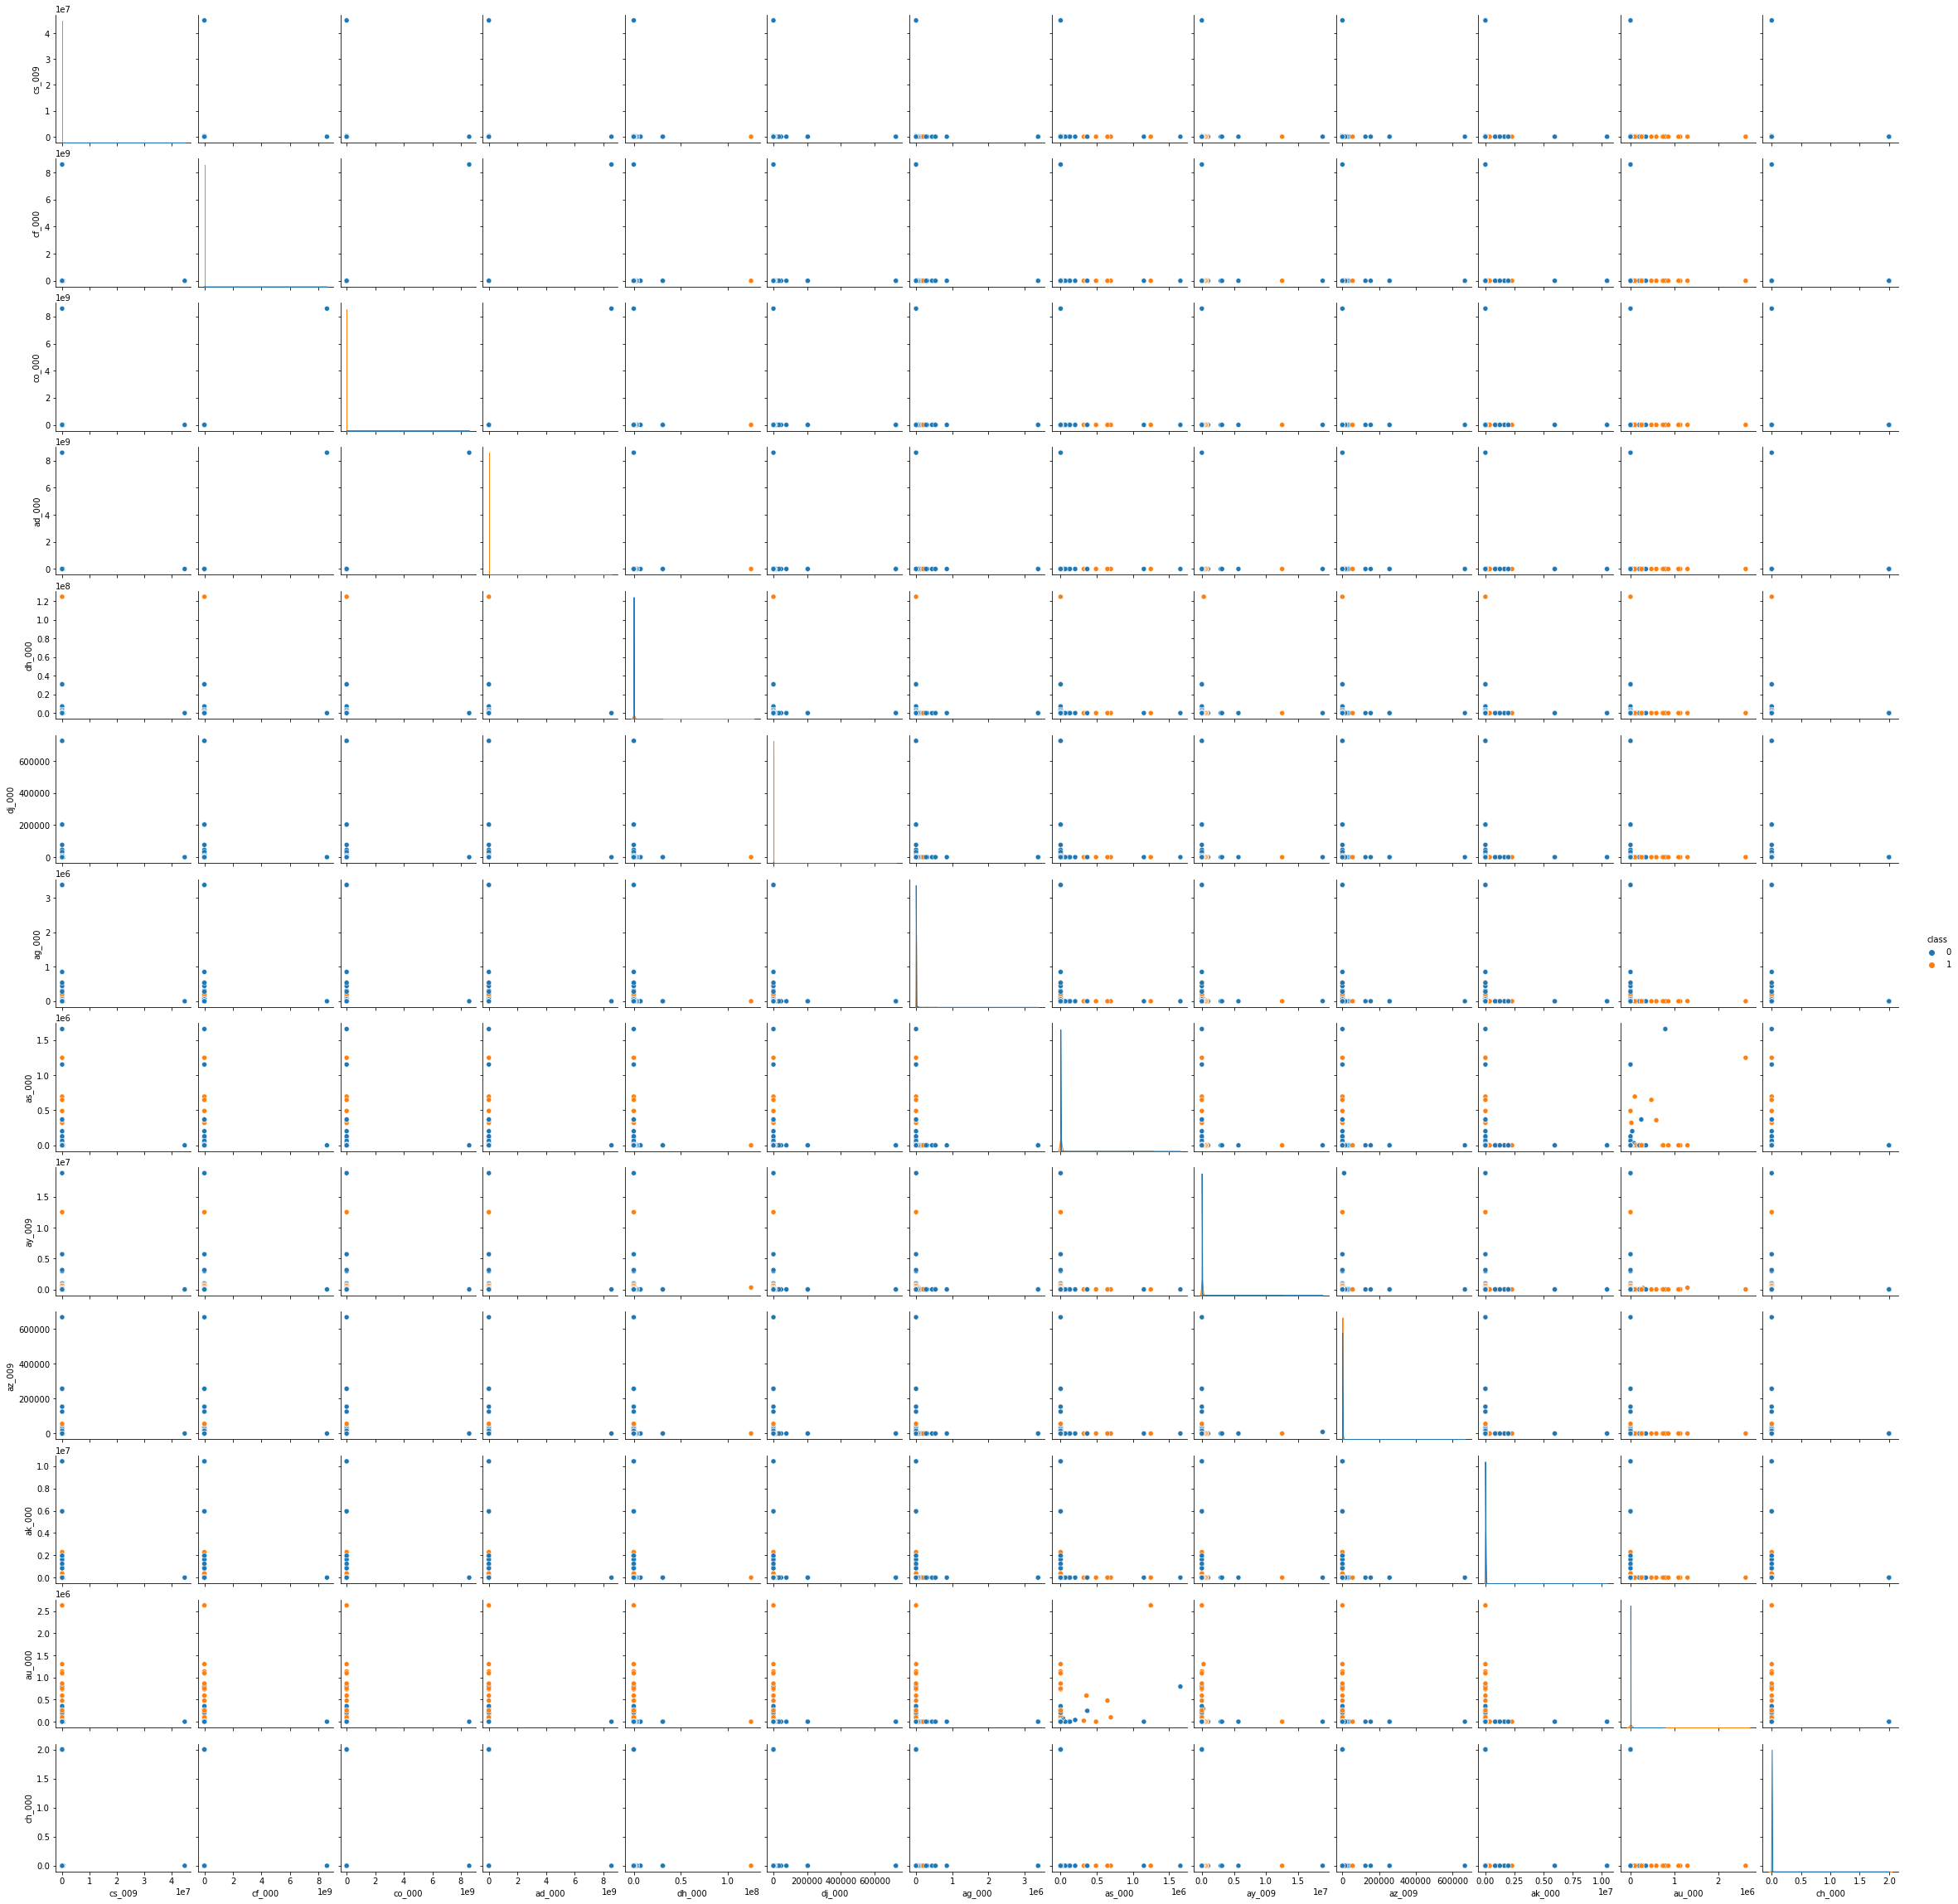

In [214]:
# scatter plots
sn.pairplot(data=train_df, kind='scatter',hue='class')

#### Findings:
#### The features 'cs_009', 'cf_000', 'co_000', 'ad_000', 'dh_000', 'dj_000' and 'au_000' may be significant.

array([[<AxesSubplot:title={'center':'cs_009'}, xlabel='class'>,
        <AxesSubplot:title={'center':'cf_000'}, xlabel='class'>,
        <AxesSubplot:title={'center':'co_000'}, xlabel='class'>,
        <AxesSubplot:title={'center':'ad_000'}, xlabel='class'>],
       [<AxesSubplot:title={'center':'dh_000'}, xlabel='class'>,
        <AxesSubplot:title={'center':'dj_000'}, xlabel='class'>,
        <AxesSubplot:title={'center':'ag_000'}, xlabel='class'>,
        <AxesSubplot:title={'center':'as_000'}, xlabel='class'>],
       [<AxesSubplot:title={'center':'ay_009'}, xlabel='class'>,
        <AxesSubplot:title={'center':'az_009'}, xlabel='class'>,
        <AxesSubplot:title={'center':'ak_000'}, xlabel='class'>,
        <AxesSubplot:title={'center':'au_000'}, xlabel='class'>],
       [<AxesSubplot:title={'center':'ch_000'}, xlabel='class'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

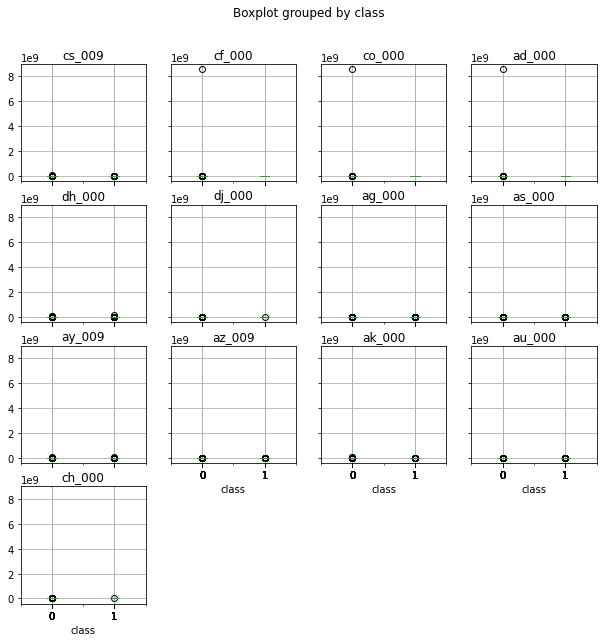

In [215]:
# Box plots
train_df.boxplot(column=p_features, by='class',figsize=(10,10))

### v. Determine the number of positive and negative data. Is this data set imbalanced?

In [216]:
pos_num = 0
neg_num = 0
for y in y_train:
    if y==1:
        pos_num+=1
    elif y==0:
        neg_num+=1
print('The number of positive data:', pos_num)
print('The number of negative data:', neg_num)

The number of positive data: 1000
The number of negative data: 59000


This data set is imbalanced.

## c. Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error

In [217]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, criterion="gini", 
                    min_samples_split=200, max_features="sqrt", 
                    bootstrap=True, oob_score=True, 
                    random_state=1, max_samples=40000)
model_rf = model_rf.fit(X_train, list(y_train))

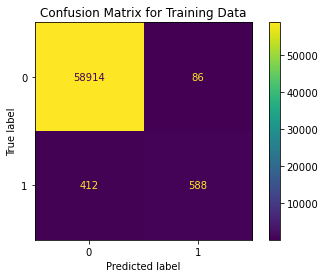

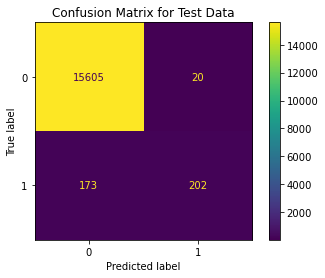

Misclassification for training data:
False Positives: 86
False Negatives: 412
------------------------------------------------------------
Misclassification for test data:
False Positives: 20
False Negatives: 173


In [218]:
# Confusion matrix for training data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model_rf.predict(X_train)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(list(y_train),y_pred))
fp = confusion_matrix(list(y_train),y_pred)[0][1]
fn = confusion_matrix(list(y_train),y_pred)[1][0]
cm_disp.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()

# Confusion matrix for test data
y_pred_test = model_rf.predict(X_test)
cm_disp_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(list(y_test),y_pred_test))
fp_test = confusion_matrix(list(y_test),y_pred_test)[0][1]
fn_test = confusion_matrix(list(y_test),y_pred_test)[1][0]
cm_disp_test.plot()
plt.title('Confusion Matrix for Test Data')
plt.show()

print('Misclassification for training data:')
print('False Positives:', fp)
print('False Negatives:', fn)
print('------------------------------------------------------------')
print('Misclassification for test data:')
print('False Positives:', fp_test)
print('False Negatives:', fn_test)

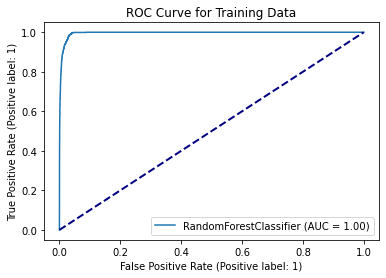

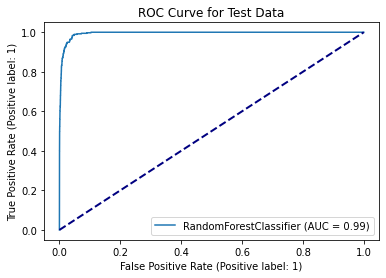

In [219]:
# ROC for training data
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model_rf, X_train,list(y_train))
plt.plot([0, 1], [0, 1], color="navy", linewidth=2, linestyle="--")
plt.title('ROC Curve for Training Data')
plt.show()

# ROC for test data
RocCurveDisplay.from_estimator(model_rf, X_test,list(y_test))
plt.plot([0, 1], [0, 1], color="navy", linewidth=2, linestyle="--")
plt.title('ROC Curve for Test Data')
plt.show()

In [220]:
# AUC for training data
from sklearn.metrics import roc_auc_score
trainAUC = roc_auc_score(list(y_train),model_rf.predict_proba(X_train)[:,1])
print('AUC for training data:', trainAUC)
print('------------------------------------------------------------')
# AUC for test data
testAUC = roc_auc_score(list(y_test),model_rf.predict_proba(X_test)[:,1])
print('AUC for test data:', testAUC)

AUC for training data: 0.996014652542373
------------------------------------------------------------
AUC for test data: 0.9946864640000002


In [221]:
mean_accuracy_train = model_rf.score(X_train, list(y_train))
error_train = 1 - mean_accuracy_train
mean_accuracy_test = model_rf.score(X_test, list(y_test))
error_test = 1 - mean_accuracy_test
print('Accuracy for training data:', mean_accuracy_train)
print('Misclassification for training data:', error_train)
print('------------------------------------------------------------')
print('Accuracy for test data:', mean_accuracy_test)
print('Misclassification for test data:', error_test)

Accuracy for training data: 0.9917
Misclassification for training data: 0.008299999999999974
------------------------------------------------------------
Accuracy for test data: 0.9879375
Misclassification for test data: 0.012062499999999976


In [222]:
# Out of Bag error estimate
error_oob = 1 - model_rf.oob_score_
print('Out of Bag error:', error_oob)

Out of Bag error: 0.009533333333333283


#### Findings:
#### The Out-of-Bag error and the test error are very close. It turns out that Out-of-Bag Error is a good way to estimate the test error.

## d. Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results with those of 1c

In [223]:
# Set class_weight="balanced_subsample"
model_rf2 = RandomForestClassifier(n_estimators=100, criterion="gini", 
                    min_samples_split=200, max_features="sqrt", 
                    bootstrap=True, oob_score=True, 
                    random_state=1, max_samples=40000,
                    class_weight="balanced_subsample")
model_rf2 = model_rf2.fit(X_train, list(y_train))

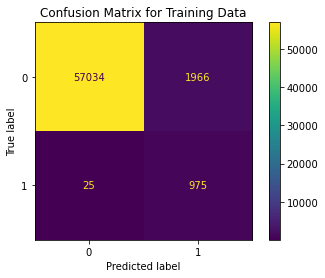

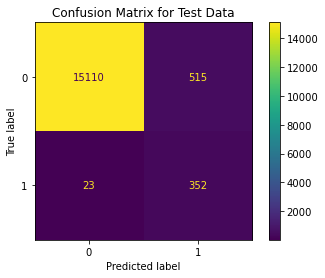

Misclassification for training data:
False Positives: 1966
False Negatives: 25
------------------------------------------------------------
Misclassification for test data:
False Positives: 515
False Negatives: 23


In [224]:
# Confusion matrix for training data
y_pred2 = model_rf2.predict(X_train)
cm_disp2 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(list(y_train),y_pred2))
fp2 = confusion_matrix(list(y_train),y_pred2)[0][1]
fn2 = confusion_matrix(list(y_train),y_pred2)[1][0]
cm_disp2.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()

# Confusion matrix for test data
y_pred2_test = model_rf2.predict(X_test)
cm_disp2_test = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(list(y_test),y_pred2_test))
fp2_test = confusion_matrix(list(y_test),y_pred2_test)[0][1]
fn2_test = confusion_matrix(list(y_test),y_pred2_test)[1][0]
cm_disp2_test.plot()
plt.title('Confusion Matrix for Test Data')
plt.show()

print('Misclassification for training data:')
print('False Positives:', fp2)
print('False Negatives:', fn2)
print('------------------------------------------------------------')
print('Misclassification for test data:')
print('False Positives:', fp2_test)
print('False Negatives:', fn2_test)

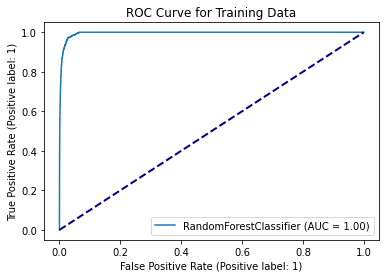

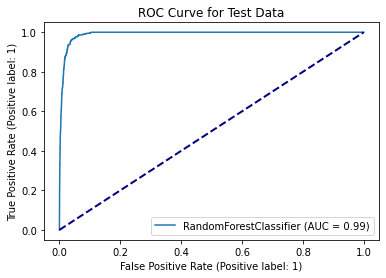

In [225]:
# ROC for training data
RocCurveDisplay.from_estimator(model_rf2, X_train,list(y_train))
plt.plot([0, 1], [0, 1], color="navy", linewidth=2, linestyle="--")
plt.title('ROC Curve for Training Data')
plt.show()

# ROC for test data
RocCurveDisplay.from_estimator(model_rf2, X_test,list(y_test))
plt.plot([0, 1], [0, 1], color="navy", linewidth=2, linestyle="--")
plt.title('ROC Curve for Test Data')
plt.show()

In [226]:
# AUC for training data
trainAUC2 = roc_auc_score(list(y_train),model_rf2.predict_proba(X_train)[:,1])
print('AUC for training data:', trainAUC2)
print('------------------------------------------------------------')
# AUC for test data
testAUC2 = roc_auc_score(list(y_test),model_rf2.predict_proba(X_test)[:,1])
print('AUC for test data:', testAUC2)

AUC for training data: 0.9954285423728815
------------------------------------------------------------
AUC for test data: 0.9909321386666666


In [227]:
mean_accuracy_train2 = model_rf2.score(X_train, list(y_train))
error_train2 = 1 - mean_accuracy_train2
mean_accuracy_test2 = model_rf2.score(X_test, list(y_test))
error_test2 = 1 - mean_accuracy_test2
print('Accuracy for training data:', mean_accuracy_train2)
print('Misclassification for training data:', error_train2)
print('------------------------------------------------------------')
print('Accuracy for test data:', mean_accuracy_test2)
print('Misclassification for test data:', error_test2)

Accuracy for training data: 0.9668166666666667
Misclassification for training data: 0.03318333333333334
------------------------------------------------------------
Accuracy for test data: 0.966375
Misclassification for test data: 0.033625000000000016


In [228]:
# Out of Bag error estimate
error_oob2 = 1 - model_rf2.oob_score_
print('Out of Bag error:', error_oob2)

Out of Bag error: 0.03478333333333339


In [229]:
# Compare the results
dic_compare = {}
comp_index = ['False Positives(Train)','False Negatives(Train)','False Positives(Test)','False Negatives(Test)','AUC(Train)','AUC(Test)','Error(Train)','Error(Test)','OOB Error']
dic_compare['Random Forest (Class Imbalance)'] = [fp, fn, fp_test, fn_test, trainAUC, testAUC, error_train, error_test, error_oob]
dic_compare['Random Forest (Class Imbalance Addressed)'] = [fp2, fn2, fp2_test, fn2_test, trainAUC2, testAUC2, error_train2, error_test2, error_oob2]
df_compare = pd.DataFrame(dic_compare,dtype=object)
df_compare.index = comp_index
df_compare

,Random Forest (Class Imbalance),Random Forest (Class Imbalance Addressed)
False Positives(Train),86,1966
False Negatives(Train),412,25
False Positives(Test),20,515
False Negatives(Test),173,23
AUC(Train),0.996015,0.995429
AUC(Test),0.994686,0.990932
Error(Train),0.0083,0.033183
Error(Test),0.012062,0.033625
OOB Error,0.009533,0.034783


#### Findings:
#### After compensating for class imbalance in random forest, the number of False Negative decreased and the recall of the classifier increased, which is a good thing.

## e. XGBoost and Model Trees

In [230]:
# Determine alpha using cross-validation
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
kf1 = KFold(n_splits = 5, shuffle=True, random_state=1)
accuracy_rows = []
for train_index, test_index in kf1.split(X_train):
    accuracys_per = []
    for alpha in 5*np.logspace(-3, 0, 10):
        xgb = XGBClassifier(booster='gbtree',
                    n_estimators=100, learning_rate=0.01, max_depth=1, reg_alpha=alpha,
                    objective='binary:logistic')
        xgb = xgb.fit(X_train.iloc[train_index],y_train.iloc[train_index])
        accu = xgb.score(X_train.iloc[test_index],list(y_train.iloc[test_index]))
        accuracys_per.append(accu)
    accuracy_rows.append(accuracys_per)
accu_alpha_list = []
for i in range(len(5*np.logspace(-3, 0, 10))):
    sum_per = 0
    for j in range(len(accuracy_rows)):
        sum_per = sum_per + accuracy_rows[j][i]
    accu_alpha = sum_per/len(accuracy_rows)
    accu_alpha_list.append(accu_alpha)
best_ind = accu_alpha_list.index(max(accu_alpha_list))
best_alpha = 5*np.logspace(-3, 0, 10)[best_ind]
print('Best alpha:', best_alpha)

Best alpha: 0.005


In [231]:
# Use training set and the best alpha to train the model
xgb_best = XGBClassifier(booster='gbtree',
                    n_estimators=100, learning_rate=0.01, max_depth=1, reg_alpha=best_alpha,
                    objective='binary:logistic')
xgb_best = xgb_best.fit(X_train, y_train)

accu_train = xgb_best.score(X_train, list(y_train))
accu_test = xgb_best.score(X_test, list(y_test))
error_train_xgb = 1 - accu_train
error_test_xgb = 1 - accu_test
error_5_fold = 1 - max(accu_alpha_list)

print('5 fold CV error:', error_5_fold)
print('Test error:', error_test_xgb)
print('Train error:', error_train_xgb)

5 fold CV error: 0.014516666666666622
Test error: 0.02012499999999995
Train error: 0.014566666666666617


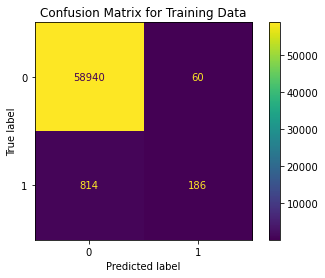

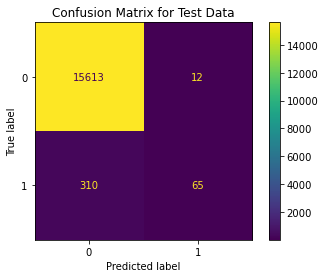

Misclassification for training data:
False Positives: 60
False Negatives: 814
Recall: 0.186
------------------------------------------------------------
Misclassification for test data:
False Positives: 12
False Negatives: 310
Recall: 0.17333333333333334


In [232]:
# Confusion matrix for training data
y_pred_xgb = xgb_best.predict(X_train)
cm_disp_xgb = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(list(y_train),y_pred_xgb))
fp_xgb = confusion_matrix(list(y_train),y_pred_xgb)[0][1]
fn_xgb = confusion_matrix(list(y_train),y_pred_xgb)[1][0]
tp_xgb = confusion_matrix(list(y_train),y_pred_xgb)[1][1]
recall_xgb = tp_xgb/(tp_xgb+fn_xgb)
cm_disp_xgb.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()

# Confusion matrix for test data
y_pred_test_xgb = xgb_best.predict(X_test)
cm_disp_test_xgb = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(list(y_test),y_pred_test_xgb))
fp_test_xgb = confusion_matrix(list(y_test),y_pred_test_xgb)[0][1]
fn_test_xgb = confusion_matrix(list(y_test),y_pred_test_xgb)[1][0]
tp_test_xgb = confusion_matrix(list(y_test),y_pred_test_xgb)[1][1]
recall_test_xgb = tp_test_xgb/(tp_test_xgb+fn_test_xgb)
cm_disp_test_xgb.plot()
plt.title('Confusion Matrix for Test Data')
plt.show()

print('Misclassification for training data:')
print('False Positives:', fp_xgb)
print('False Negatives:', fn_xgb)
print('Recall:', recall_xgb)
print('------------------------------------------------------------')
print('Misclassification for test data:')
print('False Positives:', fp_test_xgb)
print('False Negatives:', fn_test_xgb)
print('Recall:', recall_test_xgb)

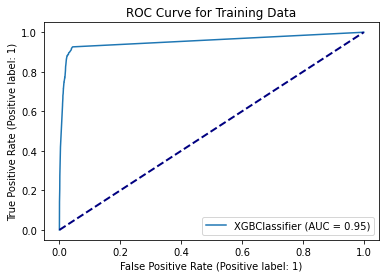

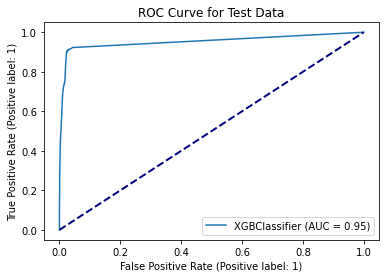

In [233]:
# ROC for training data
RocCurveDisplay.from_estimator(xgb_best, X_train,list(y_train))
plt.plot([0, 1], [0, 1], color="navy", linewidth=2, linestyle="--")
plt.title('ROC Curve for Training Data')
plt.show()

# ROC for test data
RocCurveDisplay.from_estimator(xgb_best, X_test,list(y_test))
plt.plot([0, 1], [0, 1], color="navy", linewidth=2, linestyle="--")
plt.title('ROC Curve for Test Data')
plt.show()

In [234]:
# AUC for training data
trainAUC_xgb = roc_auc_score(list(y_train),xgb_best.predict_proba(X_train)[:,1])
print('AUC for training data:', trainAUC_xgb)
print('------------------------------------------------------------')
# AUC for test data
testAUC_xgb = roc_auc_score(list(y_test),xgb_best.predict_proba(X_test)[:,1])
print('AUC for test data:', testAUC_xgb)

AUC for training data: 0.9537415932203391
------------------------------------------------------------
AUC for test data: 0.9529466026666668


## f. Use SMOTE

In [235]:
# SMOTE
from imblearn.over_sampling import SMOTE
kf2 = KFold(n_splits = 5, shuffle=True, random_state=1)
accuracy_rows2 = []
sm = SMOTE(sampling_strategy='minority', random_state=1, k_neighbors=5)
for train_index, test_index in kf2.split(X_train):
    accuracys_per2 = []    
    X_re, y_re = sm.fit_resample(X_train.iloc[train_index],list(y_train.iloc[train_index]))
    for alpha in 5*np.logspace(-3, 0, 10):
        xgb2 = XGBClassifier(booster='gbtree',
                    n_estimators=100, learning_rate=0.01, max_depth=1, reg_alpha=alpha,
                    objective='binary:logistic')
        xgb2 = xgb2.fit(X_re,y_re)
        accu2 = xgb2.score(X_train.iloc[test_index],list(y_train.iloc[test_index]))
        accuracys_per2.append(accu2)
    accuracy_rows2.append(accuracys_per2)
accu_alpha_list2 = []
for i in range(len(5*np.logspace(-3, 0, 10))):
    sum_per2 = 0
    for j in range(len(accuracy_rows2)):
        sum_per2 = sum_per2 + accuracy_rows2[j][i]
    accu_alpha2 = sum_per2/len(accuracy_rows2)
    accu_alpha_list2.append(accu_alpha2)
best_ind2 = accu_alpha_list2.index(max(accu_alpha_list2))
best_alpha2 = 5*np.logspace(-3, 0, 10)[best_ind2]
print('Best alpha:', best_alpha2)

Best alpha: 0.005


In [236]:
# Use SMOTE training set and the best alpha to train the model
sm2 = SMOTE(sampling_strategy='minority', random_state=1, k_neighbors=5)
X_smo, y_smo = sm2.fit_resample(X_train, list(y_train))
xgb_best2 = XGBClassifier(booster='gbtree',
                    n_estimators=100, learning_rate=0.01, max_depth=1, reg_alpha=best_alpha2,
                    objective='binary:logistic')
xgb_best2 = xgb_best2.fit(X_smo, y_smo)

accu_test2 = xgb_best2.score(X_test, list(y_test))
accu_train2 = xgb_best2.score(X_smo, y_smo)
error_test_xgb2 = 1 - accu_test2
error_train_xgb2 = 1 - accu_train2
error_5_fold2 = 1 - max(accu_alpha_list2)
print('5 fold CV error:', error_5_fold2)
print('Test error:', error_test_xgb2)
print('Train error:', error_train_xgb2)

5 fold CV error: 0.060833333333333295
Test error: 0.05731249999999999
Train error: 0.054923728813559336


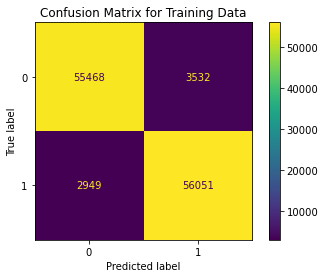

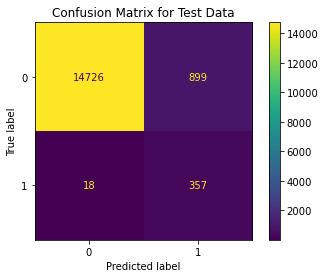

Misclassification for training data:
False Positives: 3532
False Negatives: 2949
Recall: 0.9500169491525424
------------------------------------------------------------
Misclassification for test data:
False Positives: 899
False Negatives: 18
Recall: 0.952


In [237]:
# Confusion matrix for training data
y_pred_xgb2 = xgb_best2.predict(X_smo)
cm_disp_xgb2 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_smo,y_pred_xgb2))
fp_xgb2 = confusion_matrix(y_smo,y_pred_xgb2)[0][1]
fn_xgb2 = confusion_matrix(y_smo,y_pred_xgb2)[1][0]
tp_xgb2 = confusion_matrix(y_smo,y_pred_xgb2)[1][1]
recall_xgb2 = tp_xgb2/(tp_xgb2+fn_xgb2)
cm_disp_xgb2.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()

# Confusion matrix for test data
y_pred_test_xgb2 = xgb_best2.predict(X_test)
cm_disp_test_xgb2 = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(list(y_test),y_pred_test_xgb2))
fp_test_xgb2 = confusion_matrix(list(y_test),y_pred_test_xgb2)[0][1]
fn_test_xgb2 = confusion_matrix(list(y_test),y_pred_test_xgb2)[1][0]
tp_test_xgb2 = confusion_matrix(list(y_test),y_pred_test_xgb2)[1][1]
recall_test_xgb2 = tp_test_xgb2/(tp_test_xgb2+fn_test_xgb2)
cm_disp_test_xgb2.plot()
plt.title('Confusion Matrix for Test Data')
plt.show()

print('Misclassification for training data:')
print('False Positives:', fp_xgb2)
print('False Negatives:', fn_xgb2)
print('Recall:', recall_xgb2)
print('------------------------------------------------------------')
print('Misclassification for test data:')
print('False Positives:', fp_test_xgb2)
print('False Negatives:', fn_test_xgb2)
print('Recall:', recall_test_xgb2)

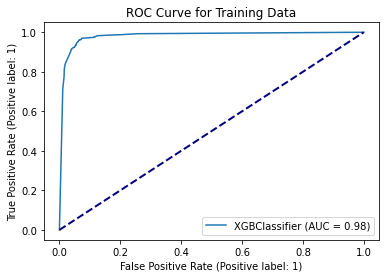

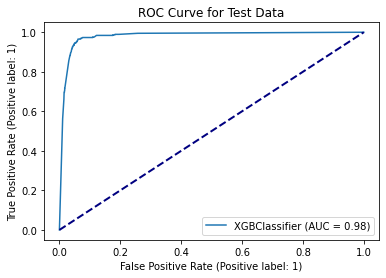

In [238]:
# ROC for training data
RocCurveDisplay.from_estimator(xgb_best2, X_smo,y_smo)
plt.plot([0, 1], [0, 1], color="navy", linewidth=2, linestyle="--")
plt.title('ROC Curve for Training Data')
plt.show()

# ROC for test data
RocCurveDisplay.from_estimator(xgb_best2, X_test,list(y_test))
plt.plot([0, 1], [0, 1], color="navy", linewidth=2, linestyle="--")
plt.title('ROC Curve for Test Data')
plt.show()

In [239]:
# AUC for training data
trainAUC_xgb2 = roc_auc_score(y_smo,xgb_best2.predict_proba(X_smo)[:,1])
print('AUC for training data:', trainAUC_xgb2)
print('------------------------------------------------------------')
# AUC for test data
testAUC_xgb2 = roc_auc_score(list(y_test),xgb_best2.predict_proba(X_test)[:,1])
print('AUC for test data:', testAUC_xgb2)

AUC for training data: 0.9808488925596093
------------------------------------------------------------
AUC for test data: 0.979539456


In [240]:
# Compare the results
dic_compare_xgb = {}
comp_index_xgb = ['False Positives(Train)','False Negatives(Train)','Recall(Train)','False Positives(Test)','False Negatives(Test)','Recall(Test)','AUC(Train)','AUC(Test)','Error(Train)','Error(Test)','5-fold CV Error']
dic_compare_xgb['XGBoost (Class Imbalance)'] = [fp_xgb, fn_xgb, recall_xgb, fp_test_xgb, fn_test_xgb, recall_test_xgb, trainAUC_xgb, testAUC_xgb, error_train_xgb, error_test_xgb, error_5_fold]
dic_compare_xgb['XGBoost (SMOTE)'] = [fp_xgb2, fn_xgb2, recall_xgb2, fp_test_xgb2, fn_test_xgb2, recall_test_xgb2, trainAUC_xgb2, testAUC_xgb2, error_train_xgb2, error_test_xgb2, error_5_fold2]
df_compare_xgb = pd.DataFrame(dic_compare_xgb,dtype=object)
df_compare_xgb.index = comp_index_xgb
df_compare_xgb

,XGBoost (Class Imbalance),XGBoost (SMOTE)
False Positives(Train),60,3532
False Negatives(Train),814,2949
Recall(Train),0.186,0.950017
False Positives(Test),12,899
False Negatives(Test),310,18
Recall(Test),0.173333,0.952
AUC(Train),0.953742,0.980849
AUC(Test),0.952947,0.979539
Error(Train),0.014567,0.054924
Error(Test),0.020125,0.057312


#### Findings:
#### After using SMOTE to preprocess the data, the recall of the classifier increased, and the AUC is higher.

# 2. ISLR 6.6.3

#### (a) As we increase s from 0, the training RSS will steadily decrease. Because the constrain region for β becomes larger and RSS will decrease towards least squares.
#### (b) The test RSS will decrease initially and then eventually start increasing in a U shape. Because the model is becoming more flexible and starts overfitting.
#### (c) The variance will steadily increase. Because the flexibility of the model increases as we increase s from 0.
#### (d) The bias will steadily decrease. Because the model is becoming more flexible and more accurate.
#### (e) The irreducible error will remain constant. Because we only reduce the reducible error as we increases s from 0.

# 3. ISLR 6.6.5

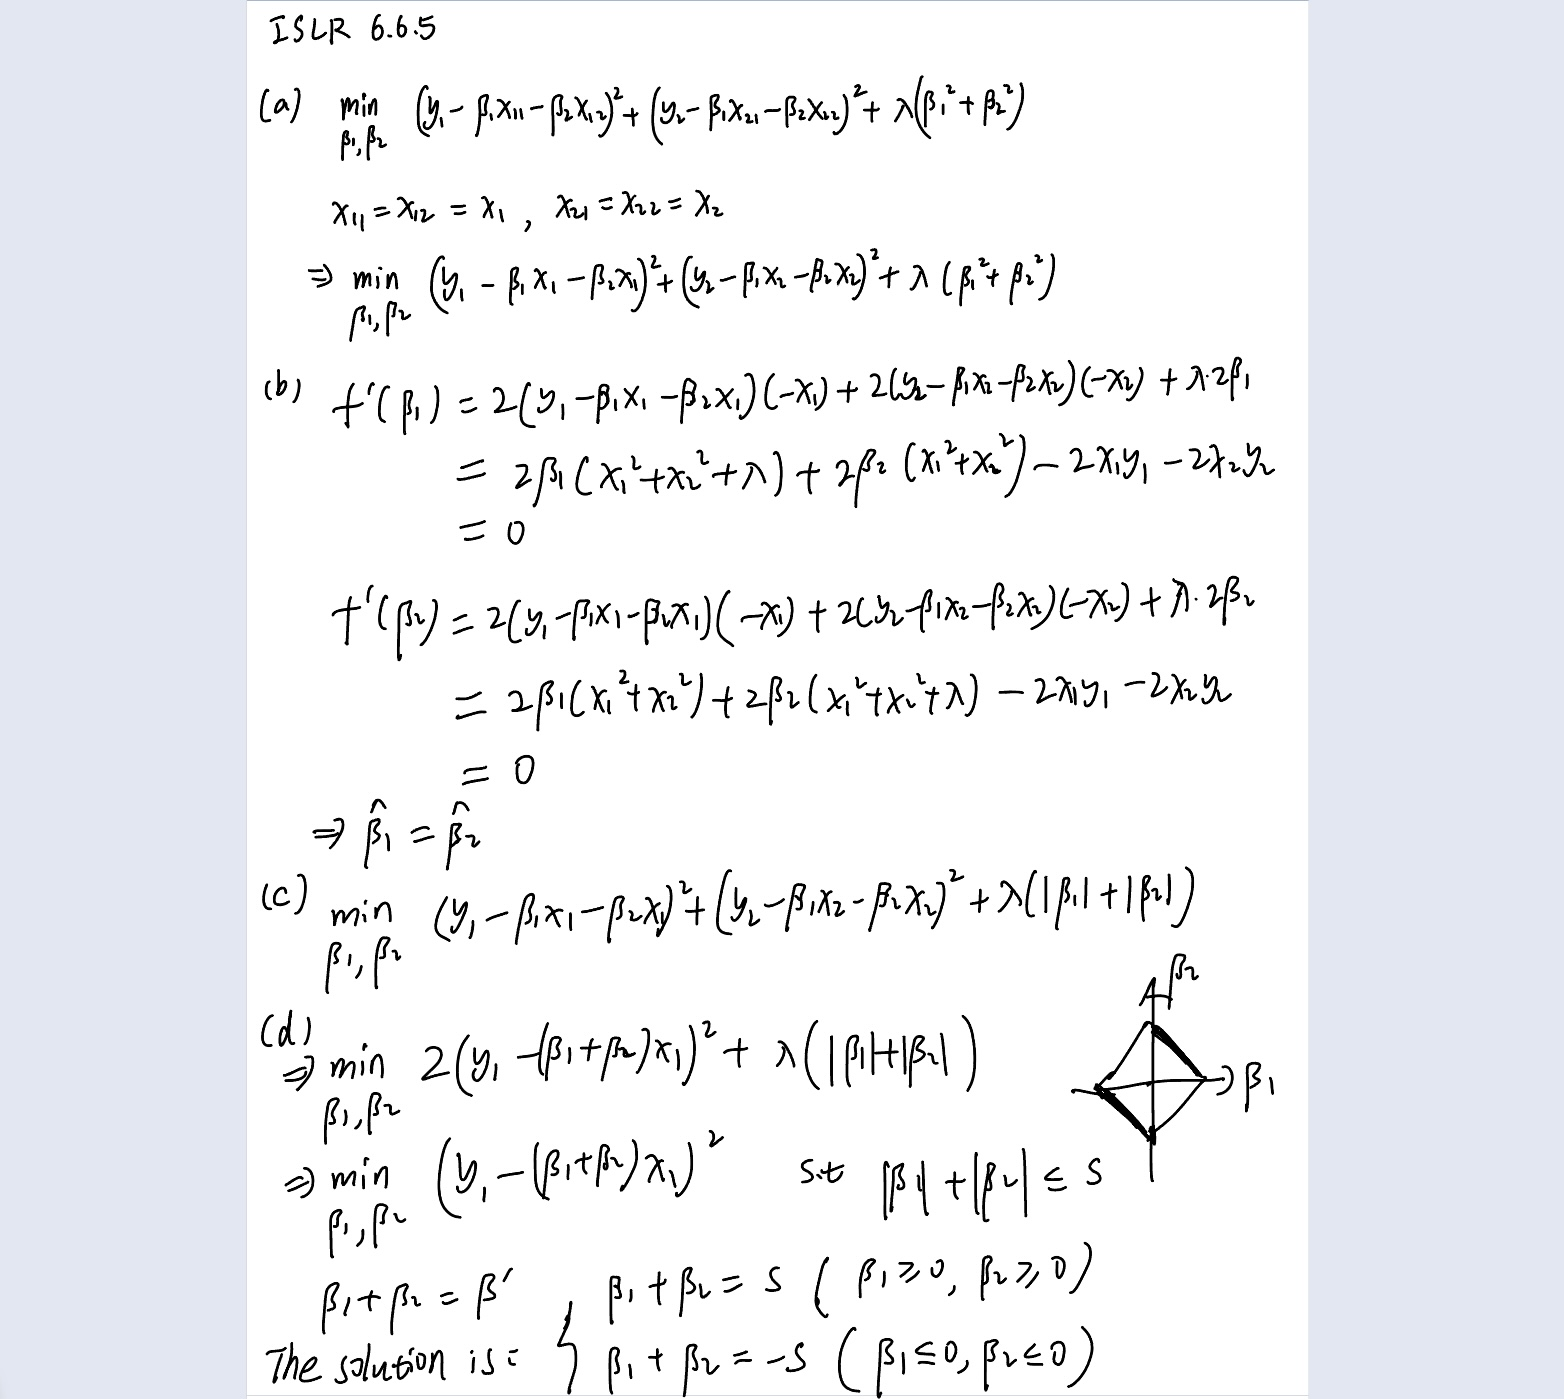

# 4. ISLR 8.4.5

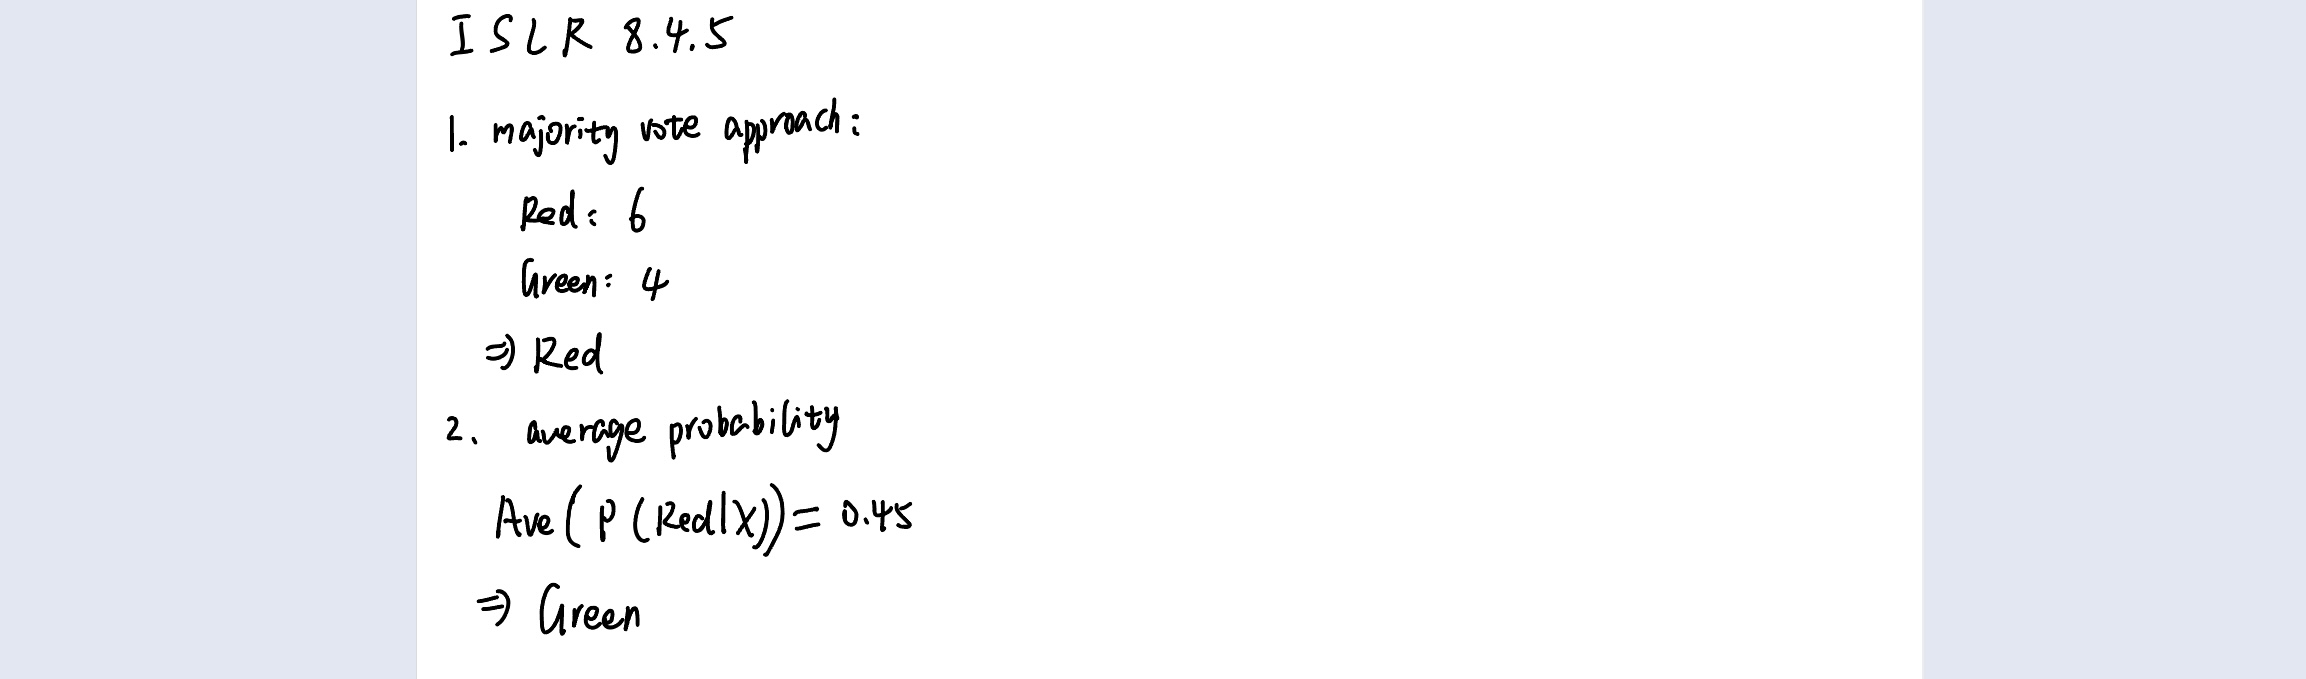

# 5. ISLR 9.7.3

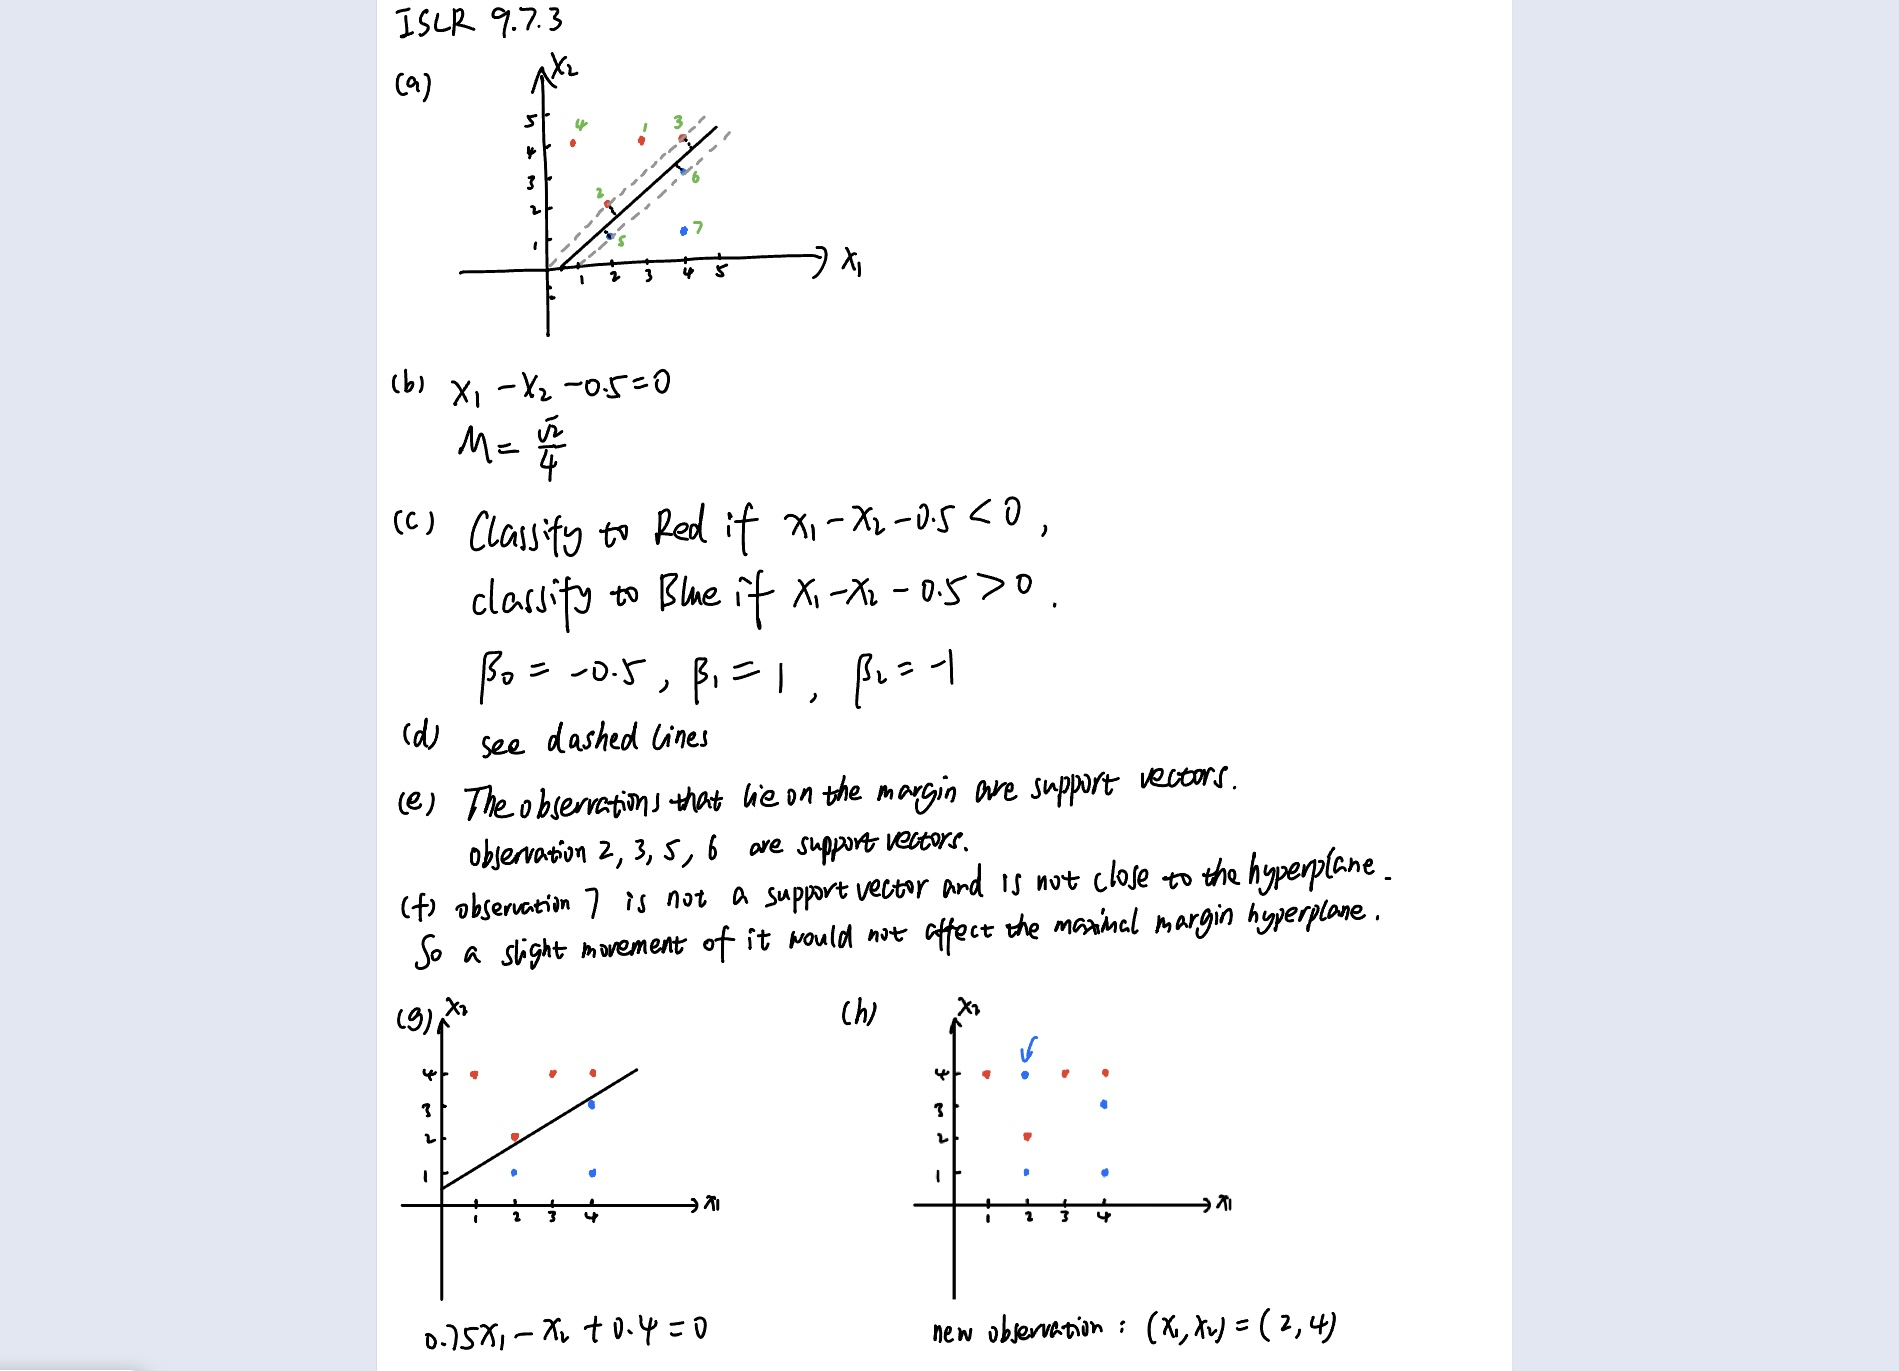